In [1]:
%matplotlib inline
import os
import sys

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

from IPython import display

In [131]:
def rundir():
    return os.path.join('/chia_cluster/home/jackyu/radiation/crd/LW/examples/separate_g_groups/study__lblnew_g1_threshold/h2o/band01_wn_0_340/nv_200/dv_0.005/ng_9/g_ascending_k_descending/refPTs_P_1_T_250__P_30_T_250__P_300_T_250/ng_refs_3__2__4/getabsth_auto__auto__auto/absth_dlogN_uniform__dlogN_uniform__dlogN_uniform/wgt_0.3_0.3_0.3__0.3_0.3__0.3_0.6_0.6_0.6/wgt_flux_2/wgt_k_1/klin_4.06197e-22/w_diffuse_1.66_1.66_1.66__1.66_1.66__1.66_1.66_1.66_1.66/crd_0964634/atmpro_rrtmg_ktable_pts')


def load_k_kdist():
    return pd.read_csv(os.path.join(rundir(), 'k_kdist.dat'),
                       sep=r'\s+')

def plt_k_kdist():

    k_kdist = load_k_kdist()

    gs = k_kdist['g'].unique()
    ng = len(gs)

    fig, axs = plt.subplots(nrows=ng, ncols=1, 
                            figsize=(10, ng * 10))

    for ax, g in zip(axs.flatten(), gs):
        df = k_kdist[k_kdist['g'] == g]
        df.plot(ax=ax, 
                kind='scatter', x='temperature', y='pressure', s=50,
                alpha=.6, 
                c='k_kdist', cmap=plt.get_cmap('jet'), colorbar=True,
                grid=True)

        ax.invert_yaxis()
        ax.set_yscale('log')
        ax.set_ylabel('pressure (mbar)')
    
        ax.set_xlabel('temperature (K)')
    
        ax.set_title('g = {}'.format(g))
        
    return fig, axs



def t_sensitivity():
    
    df = load_k_kdist()
    
    df['layer'] = df['layer'] % 5
    df['layer'] = df['layer'].replace(to_replace=0, value=5)
    
    df = df.drop('temperature', axis=1)
    
    df = df.set_index(['pressure', 'g', 'layer'])
    df = df.unstack('layer')
    
    
    t_sense = df.values[:, 1:] / df.values[:, :-1]
    tlabels = ['t0' + str(dt) if dt < 0
               else 't0+' + str(dt)
               for dt in np.linspace(-30, 30, 5)]
    
    columns = ['({}) / ({})'.format(up, down)
               for up, down in zip(tlabels[1:], tlabels[:-1])]
    
    t_sense = pd.DataFrame(t_sense, index=df.index, columns=columns)
    return t_sense



def plt_t_sensitivity():
    tsense = t_sensitivity()
    
    gs = tsense.index.levels[1]
    ng = len(gs)
    
    fig, axs = plt.subplots(nrows=ng, ncols=1,
                            figsize=(9, ng*10))

    cs = ['y', 'c', 'm', 'g']
    
    for g, ax in zip(gs, axs.flatten()):
        df = tsense.loc[(slice(None), g), :]
        df.index = df.index.droplevel('g')
        df = df.reset_index()
        
        for tratio, c in zip(df.columns[1:], cs):
            df.plot(ax=ax, kind='scatter',
                    x=tratio, y='pressure',
                    label=tratio, 
                    c=c, alpha=.5)
        
        ax.invert_yaxis()
        ax.set_yscale('log')
        ax.set_ylabel('pressure (mbar)')
        
        ax.set_xlabel('ratio')
        
        ax.grid(b=True)
        ax.set_title('g = {}'.format(g))
        
        
    return fig, axs
        

Absorption coefficient table by g-interval


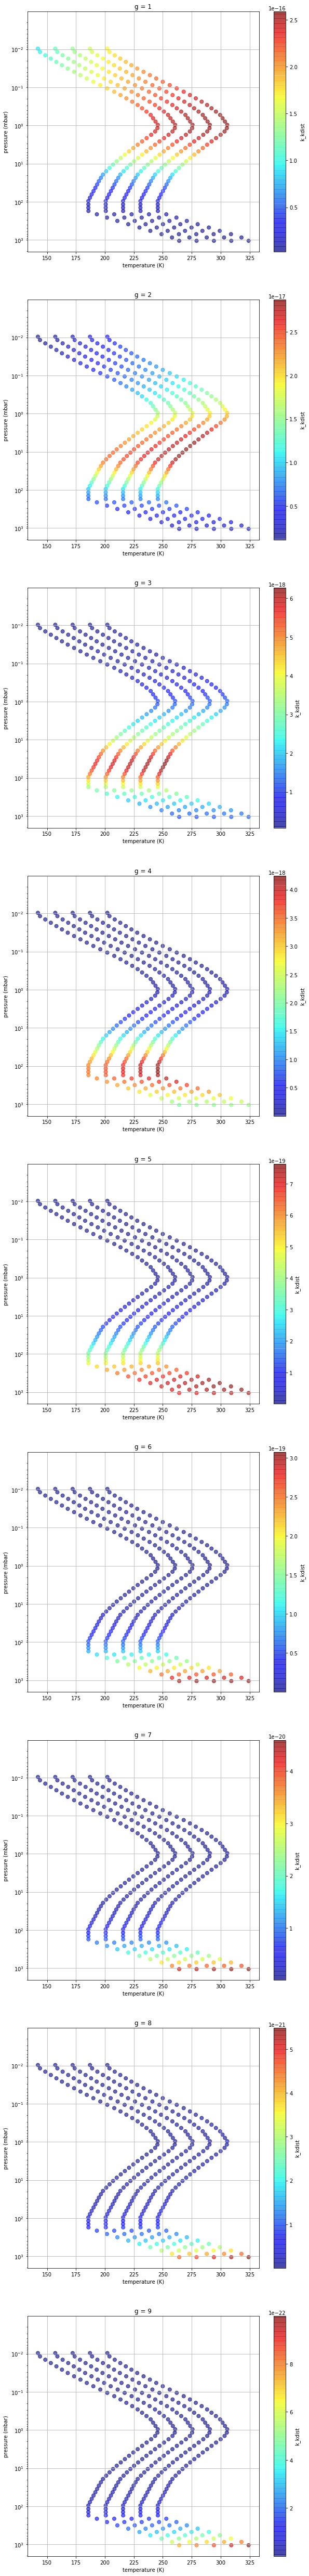

In [136]:
print('Absorption coefficient table by g-interval')

fig, axs = plt_k_kdist()

Temperature sensitivity by g-interval


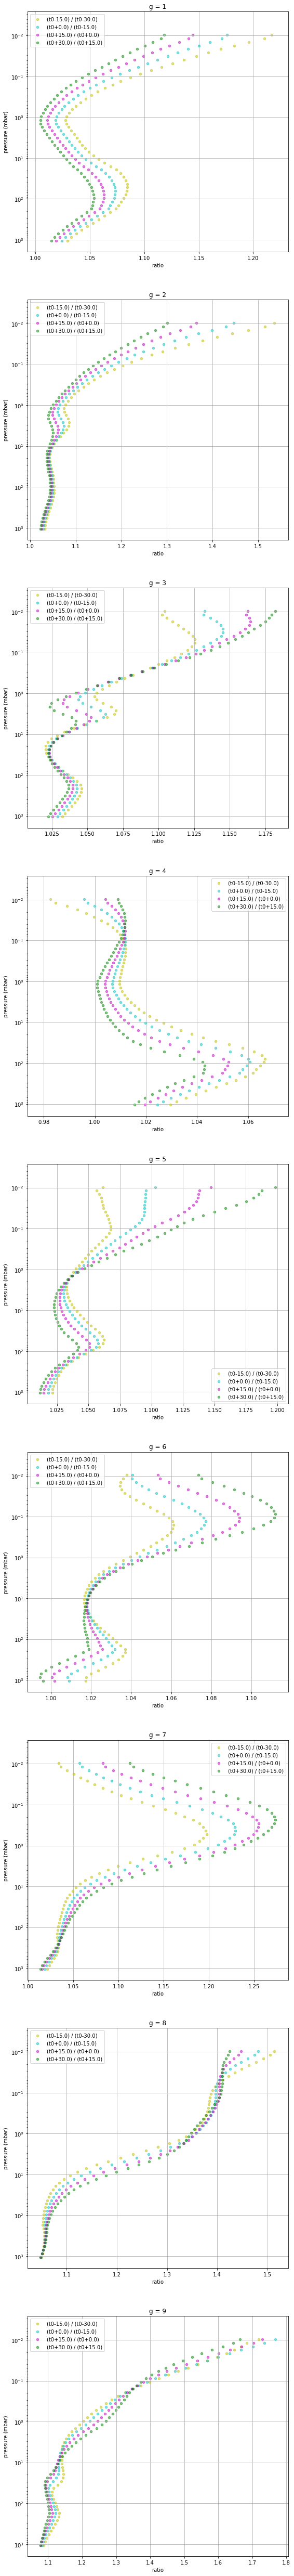

In [135]:
print('''Temperature sensitivity by g-interval''')

fig, axs = plt_t_sensitivity()

In [137]:
display.HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')